# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, \
ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline


# Load and Explore the Data

In [2]:
df = pd.read_csv('Data/stroke.csv')
df.set_index(['id'], drop=True, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Dictionary

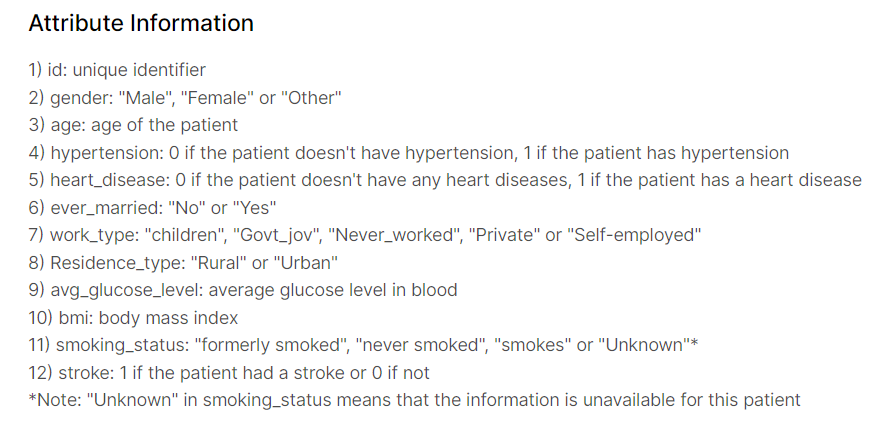

In [3]:
print(f'* There are {len(df)} rows and {len(df.columns)} columns in this dataset.')
print('\n')
print('---'*20)

print(' * The data information is showing below:')
print('\n')
print(df.info())
print('\n')
print('---'*20)

print(' * The missing values in this dataset are:')
print('\n')
print(df.isna().sum())
print('\n')

print('---'*20)
print(f' * There are {df.duplicated().sum()} duplicates in this dataset')

print('\n')
print('---'*20)
print(' * The # of unique values in each columns shown below:')
print('\n')
print(df.nunique())



      

* There are 5110 rows and 11 columns in this dataset.


------------------------------------------------------------
 * The data information is showing below:


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB
None


---------------------------------

In [4]:
# checking stats info of age, bmi, and avg_glucose_level.
df[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [5]:
#Loop through value counts.
for i in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    print(df[i].value_counts(dropna=False))

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64


# Summary

-- There are 5110 rows and 11 columns.

-- There is no duplicated rows.

-- There are 201 missing values in bmi column.

-- No inconsistent values in categorical columns

-- No impossible values in numeric columns.

-- No incorrect data type.